In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [ ]:
# Load the cleaned dataset
file_path = "../data/processed/cleaned_data.csv"
df = pd.read_csv(file_path)

# Show basic info and first few rows to confirm structure
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99492 non-null  object
 1   gender                    99492 non-null  object
 2   age                       99492 non-null  object
 3   admission_type_id         99492 non-null  int64 
 4   discharge_disposition_id  99492 non-null  int64 
 5   admission_source_id       99492 non-null  int64 
 6   time_in_hospital          99492 non-null  int64 
 7   num_lab_procedures        99492 non-null  int64 
 8   num_procedures            99492 non-null  int64 
 9   num_medications           99492 non-null  int64 
 10  number_outpatient         99492 non-null  int64 
 11  number_emergency          99492 non-null  int64 
 12  number_inpatient          99492 non-null  int64 
 13  diag_1                    99492 non-null  object
 14  diag_2                

(None,
               race  gender      age  admission_type_id  \
 0        Caucasian  Female   [0-10)                  6   
 1        Caucasian  Female  [10-20)                  1   
 2  AfricanAmerican  Female  [20-30)                  1   
 3        Caucasian    Male  [30-40)                  1   
 4        Caucasian    Male  [40-50)                  1   
 
    discharge_disposition_id  admission_source_id  time_in_hospital  \
 0                        25                    1                 1   
 1                         1                    7                 3   
 2                         1                    7                 2   
 3                         1                    7                 2   
 4                         1                    7                 1   
 
    num_lab_procedures  num_procedures  num_medications  ...  \
 0                  41               0                1  ...   
 1                  59               0               18  ...   
 2               

C:\Users\HOME\AppData\Local\Temp\ipykernel_32740\258445618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="readmitted_30", data=df, palette="Set2")


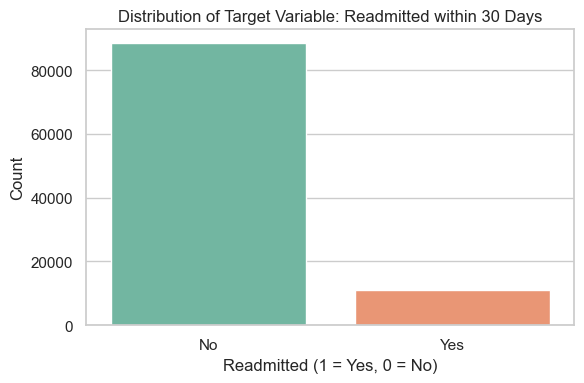

In [3]:
# Set plot style
sns.set(style="whitegrid")

# Plot distribution of target variable (readmitted_30)
plt.figure(figsize=(6, 4))
sns.countplot(x="readmitted_30", data=df, palette="Set2")
plt.title("Distribution of Target Variable: Readmitted within 30 Days")
plt.xlabel("Readmitted (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

### Target Variable – readmitted_30
There is class imbalance in the target:

Significantly more patients were not readmitted within 30 days (label 0).

Fewer were readmitted (label 1).

This imbalance is important to consider when building models — you may need strategies like:

Resampling (SMOTE, undersampling)

Adjusted class weights

Evaluation metrics like AUC-ROC, Precision/Recall over accuracy

In [6]:
# Prepare output directory if needed
os.makedirs("../data/eda_figures", exist_ok=True)

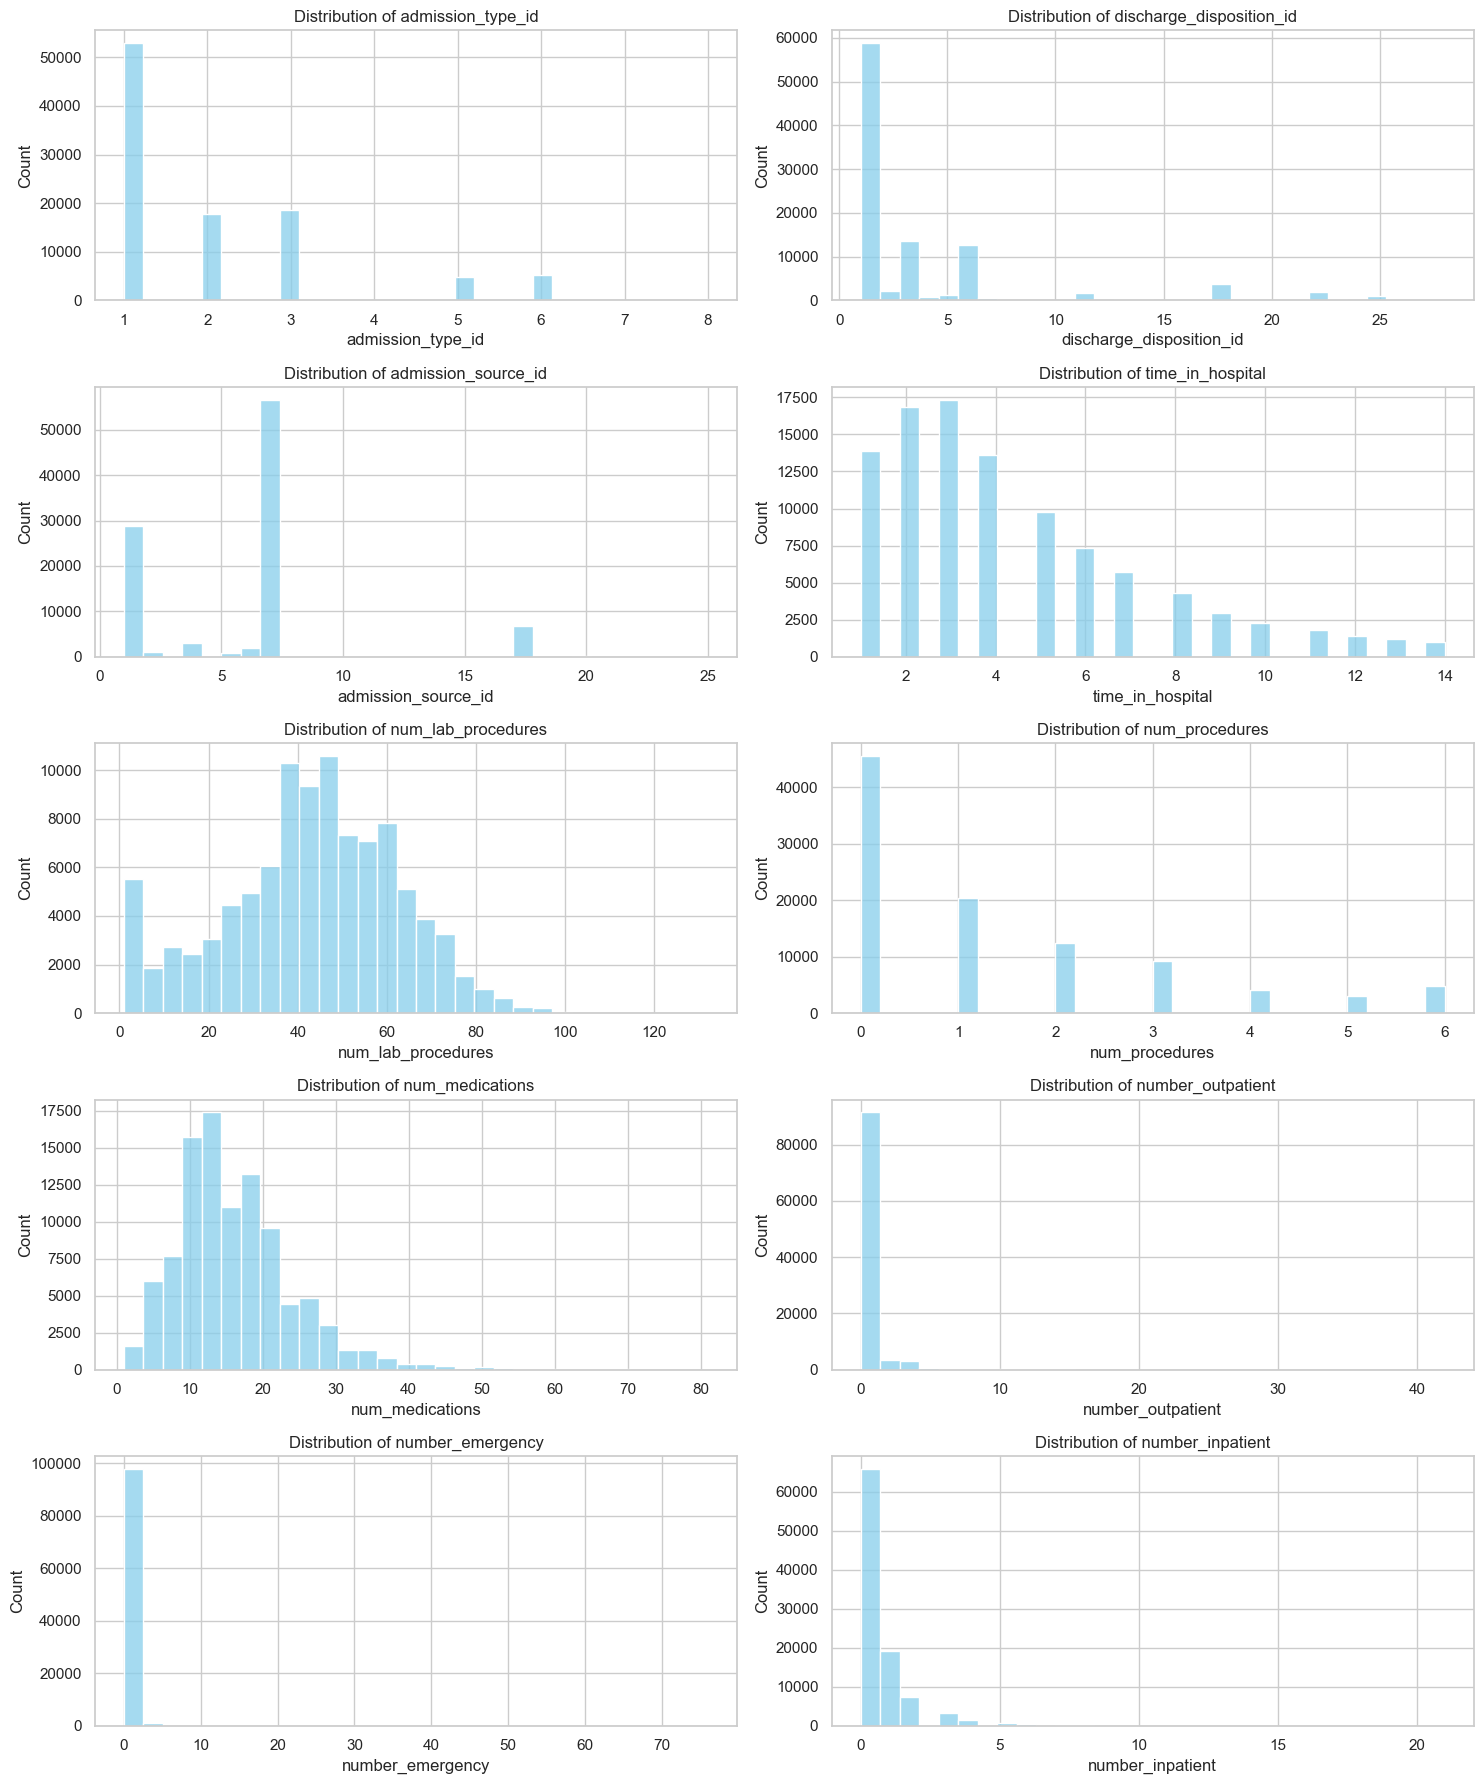

In [7]:
# 1. Plot numeric feature distributions
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()
numeric_cols.remove('readmitted_30')  # exclude target variable

# Sample a subset to avoid overcrowding
sampled_numeric_cols = numeric_cols[:10]  # first 10 for preview

# Plot histograms for numeric columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
axes = axes.flatten()
for i, col in enumerate(sampled_numeric_cols):
    sns.histplot(df[col], kde=False, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.savefig("../data/eda_figures/numeric_distributions.png")

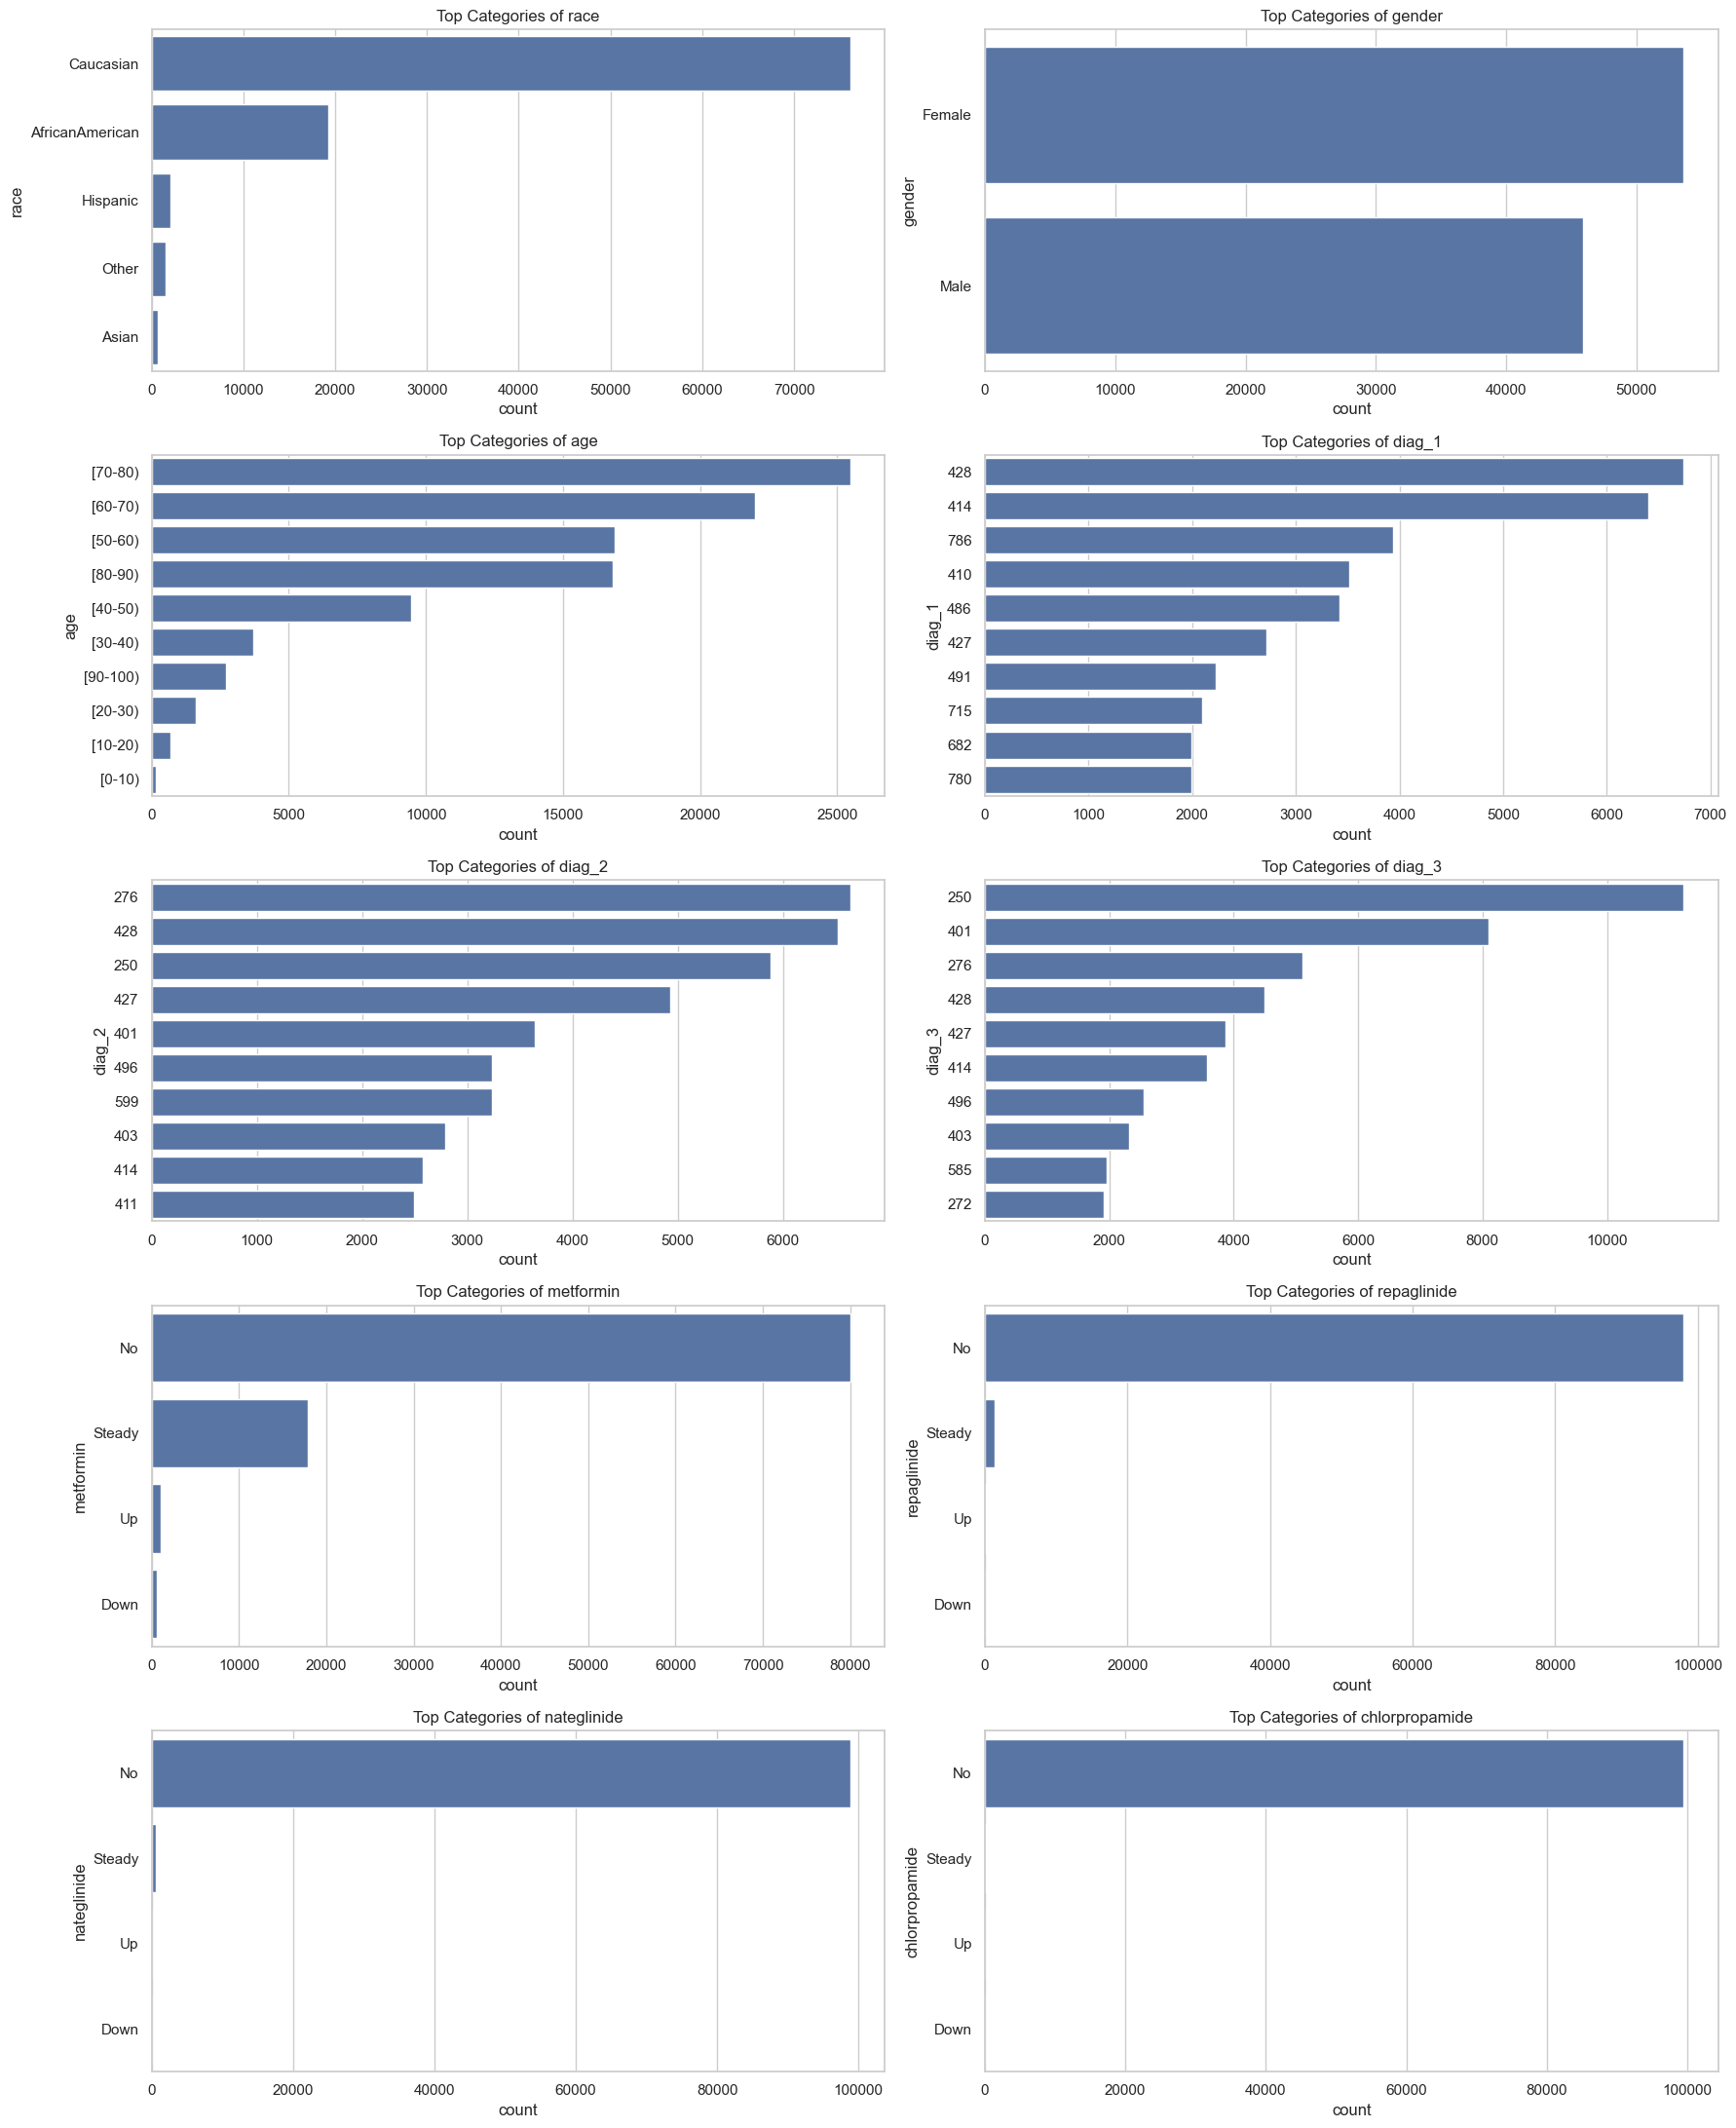

In [8]:
# 2. Plot categorical feature breakdowns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
sampled_categorical_cols = categorical_cols[:10]  # sample for brevity

# Count plots for categorical features
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 22))
axes = axes.flatten()
for i, col in enumerate(sampled_categorical_cols):
    sns.countplot(y=col, data=df, order=df[col].value_counts().index[:10], ax=axes[i])
    axes[i].set_title(f"Top Categories of {col}")
plt.tight_layout()
plt.savefig("../data/eda_figures/categorical_counts.png")

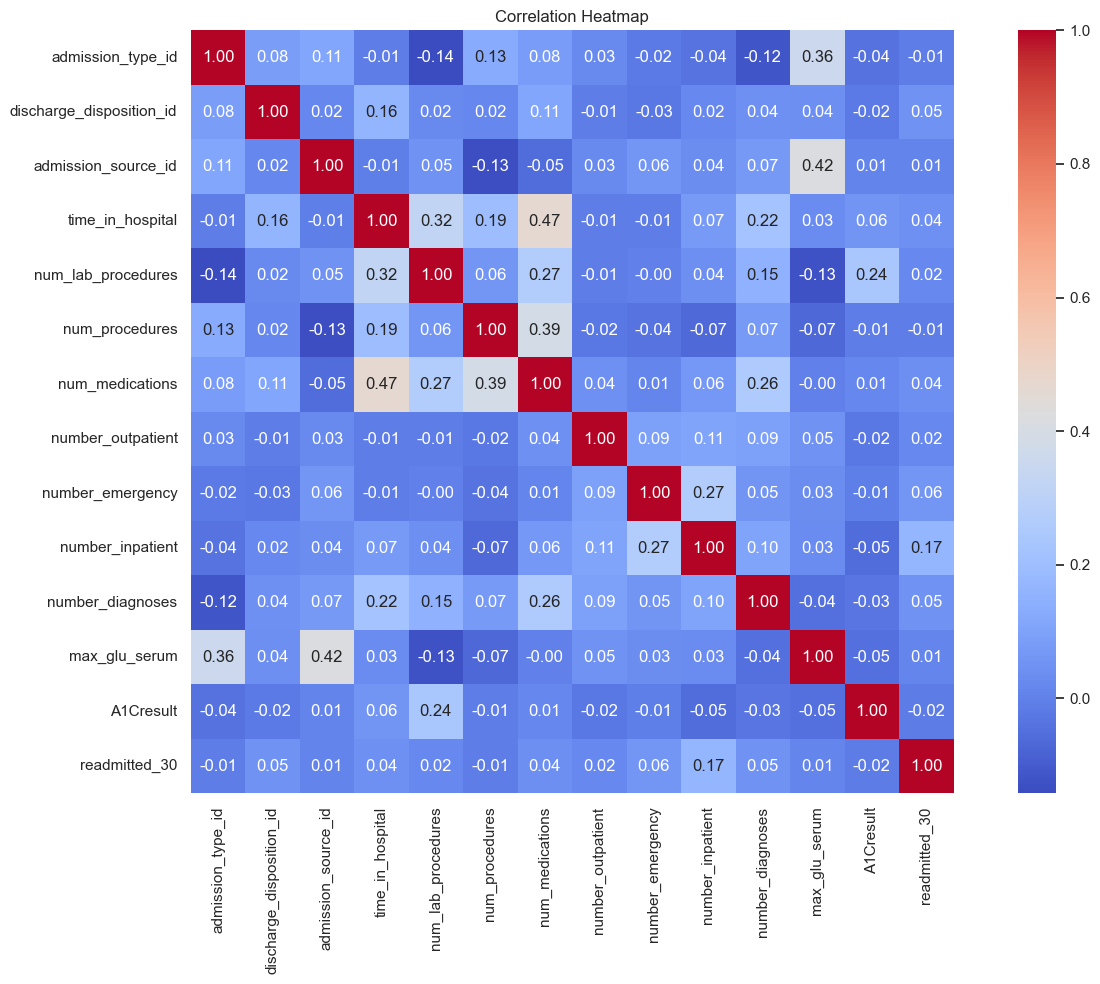

In [9]:
# 3. Correlation heatmap
corr = df[numeric_cols + ['readmitted_30']].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("../data/eda_figures/correlation_heatmap.png")

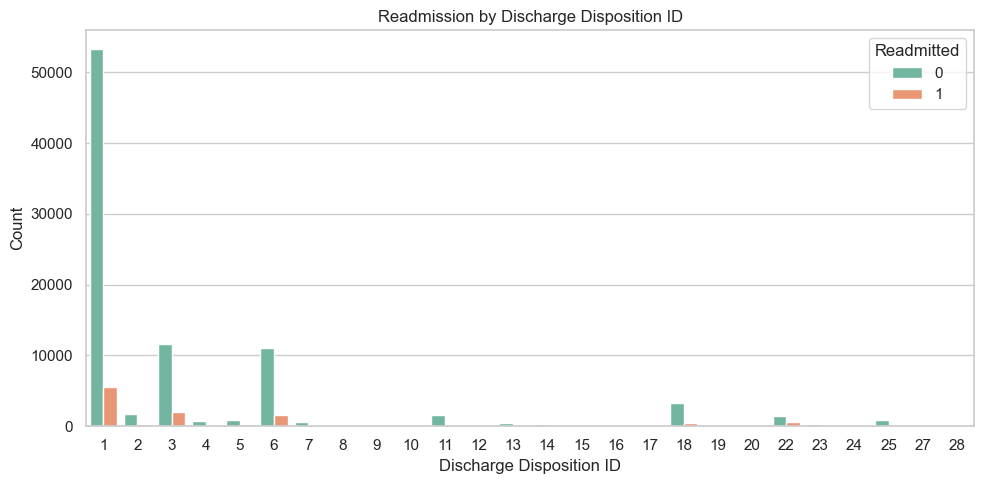

In [10]:
# Target Leakage Check — Examine discharge_disposition_id
plt.figure(figsize=(10, 5))
sns.countplot(x="discharge_disposition_id", hue="readmitted_30", data=df, palette="Set2")
plt.title("Readmission by Discharge Disposition ID")
plt.xlabel("Discharge Disposition ID")
plt.ylabel("Count")
plt.legend(title="Readmitted")
plt.tight_layout()
plt.savefig("../data/eda_figures/target_leakage_check.png")
plt.show()

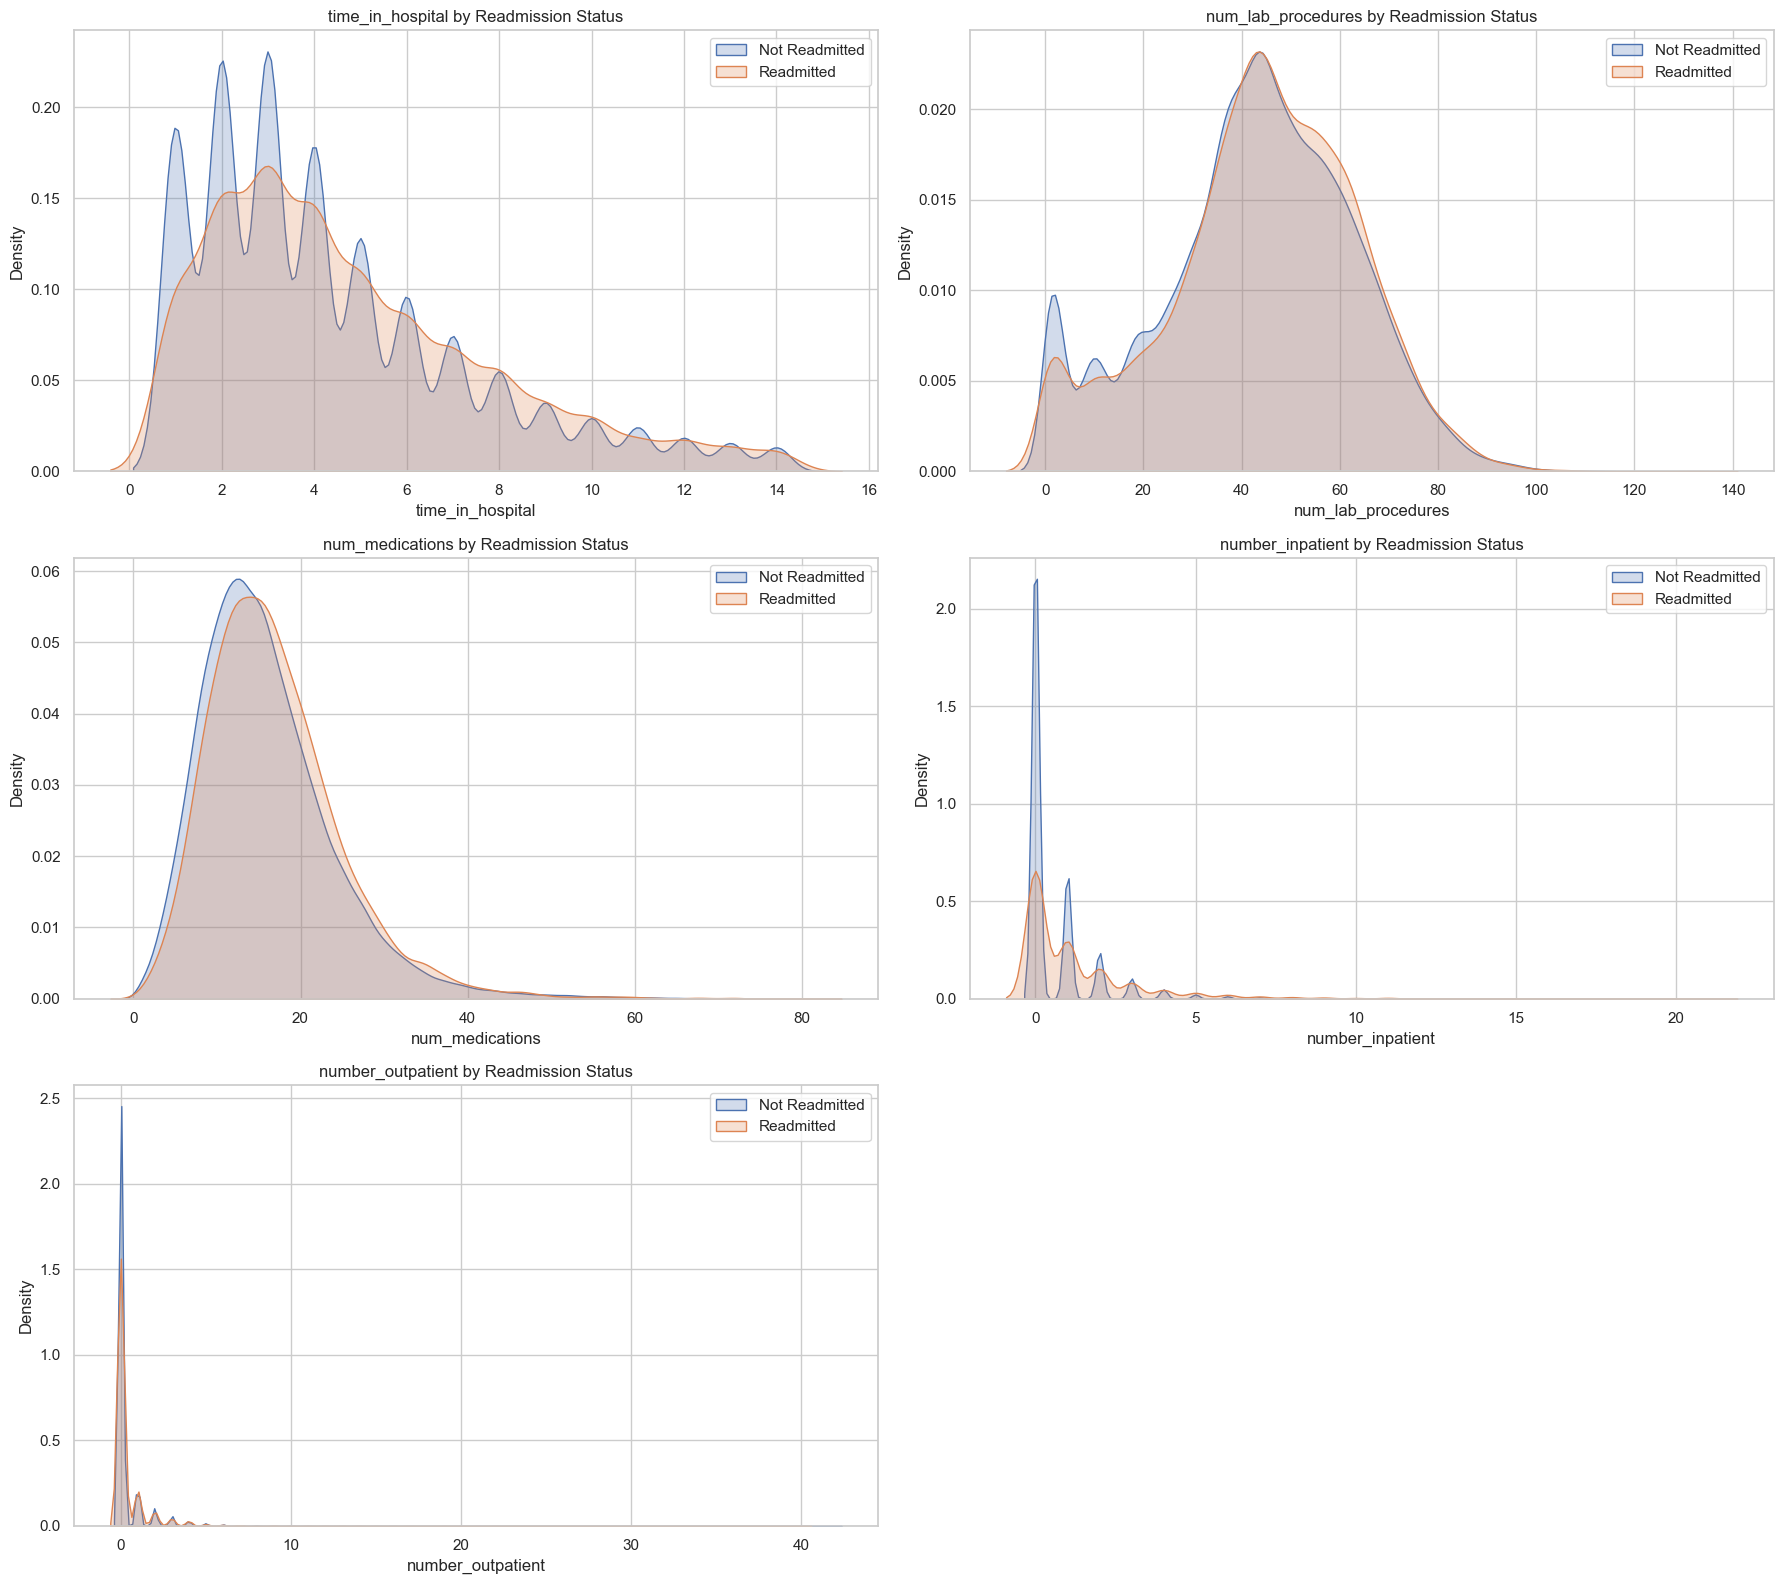

In [11]:
# Plot KDE distributions for key numeric features split by target variable
features_to_plot = [
    'time_in_hospital',
    'num_lab_procedures',
    'num_medications',
    'number_inpatient',
    'number_outpatient'
]

plt.figure(figsize=(18, 16))
for i, col in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=df[df['readmitted_30'] == 0], x=col, label="Not Readmitted", fill=True)
    sns.kdeplot(data=df[df['readmitted_30'] == 1], x=col, label="Readmitted", fill=True)
    plt.title(f"{col} by Readmission Status")
    plt.legend()
plt.tight_layout()
plt.savefig("../data/eda_figures/kde_distributions.png")
plt.show()

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select numeric features (excluding target)
numeric_features = df.select_dtypes(include=['int64']).drop(columns=["readmitted_30"])

# Add constant for VIF calculation
X = add_constant(numeric_features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)


,Feature,VIF
0,const,24.255075
7,num_medications,1.555620
12,max_glu_serum,1.416973
4,time_in_hospital,1.402646
5,num_lab_procedures,1.269709
3,admission_source_id,1.264003
6,num_procedures,1.233640
1,admission_type_id,1.227445
11,number_diagnoses,1.142748
10,number_inpatient,1.110105


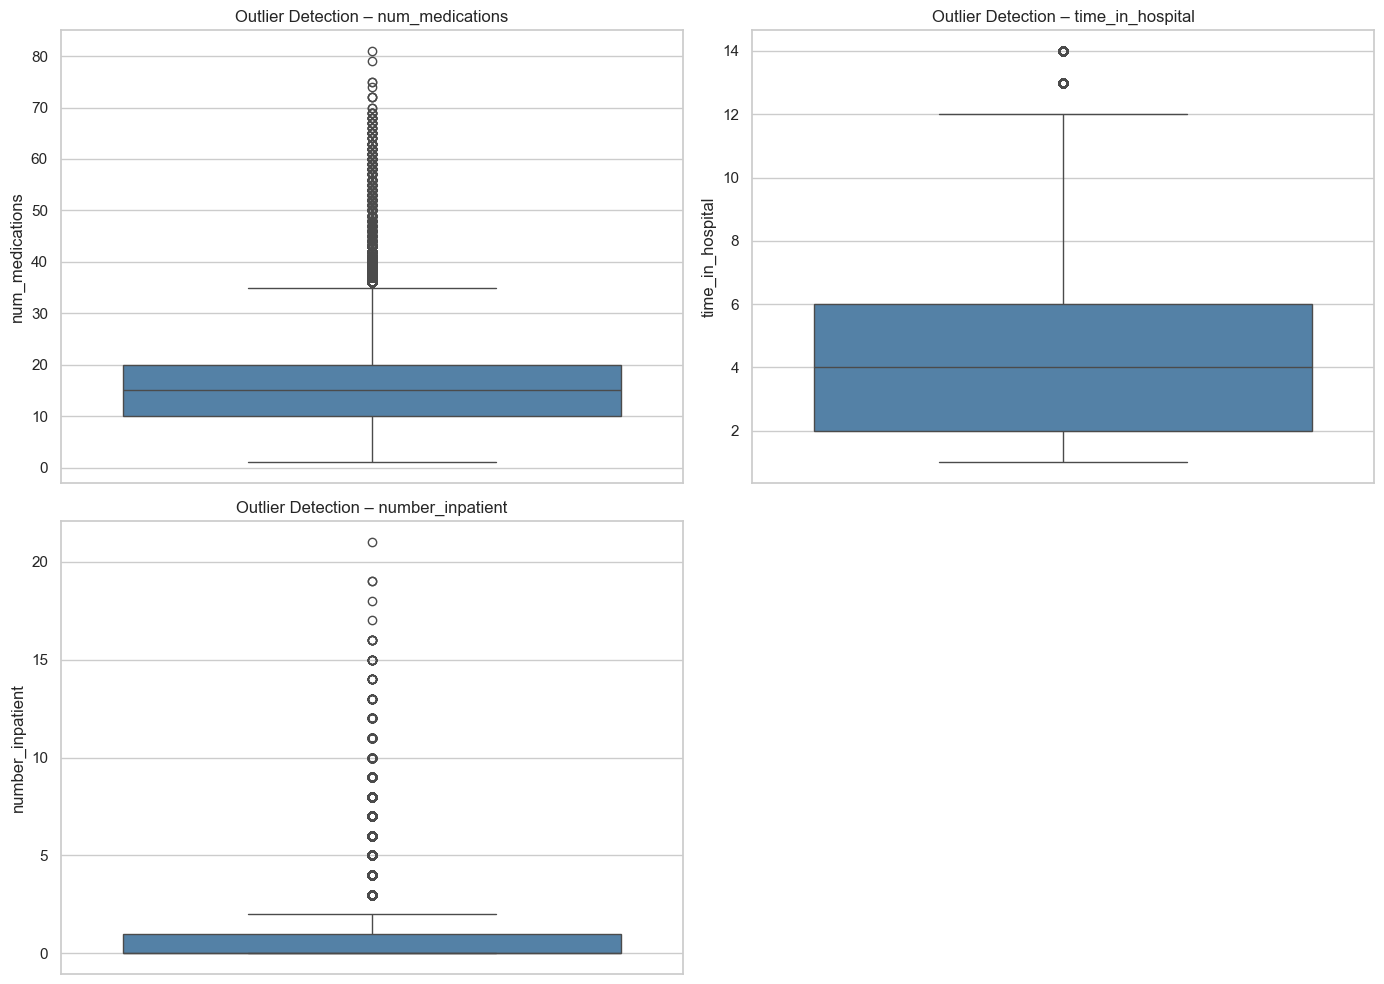

In [15]:
# Step 5: Outlier Detection using boxplots for selected features
outlier_features = ['num_medications', 'time_in_hospital', 'number_inpatient']

plt.figure(figsize=(14, 10))
for i, col in enumerate(outlier_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=col, data=df, color="steelblue")
    plt.title(f"Outlier Detection – {col}")
plt.tight_layout()
plt.savefig("../data/eda_figures/outlier_detection.png")
plt.show()

In [16]:
# Step 6: Rare Category Analysis for selected categorical columns
# We'll compute value counts and identify rare categories (< 1% frequency)

categorical_cols = [
    'repaglinide', 'tolazamide', 'nateglinide', 'examide', 'citoglipton',
    'glimepiride-pioglitazone', 'glipizide-metformin',
    'diag_1_category', 'diag_2_category', 'diag_3_category'
]

rare_categories = {}

# Threshold for rare = less than 1% of total
threshold = len(df) * 0.01

for col in categorical_cols:
    counts = df[col].value_counts()
    rare = counts[counts < threshold].index.tolist()
    if rare:
        rare_categories[col] = rare

rare_categories

{'repaglinide': ['Up', 'Down'],
 'tolazamide': ['Steady', 'Up'],
 'nateglinide': ['Steady', 'Up', 'Down'],
 'glimepiride-pioglitazone': ['Steady'],
 'glipizide-metformin': ['Steady'],
 'diag_1_category': ['Unknown', 'External Causes'],
 'diag_2_category': ['External Causes', 'Unknown']}

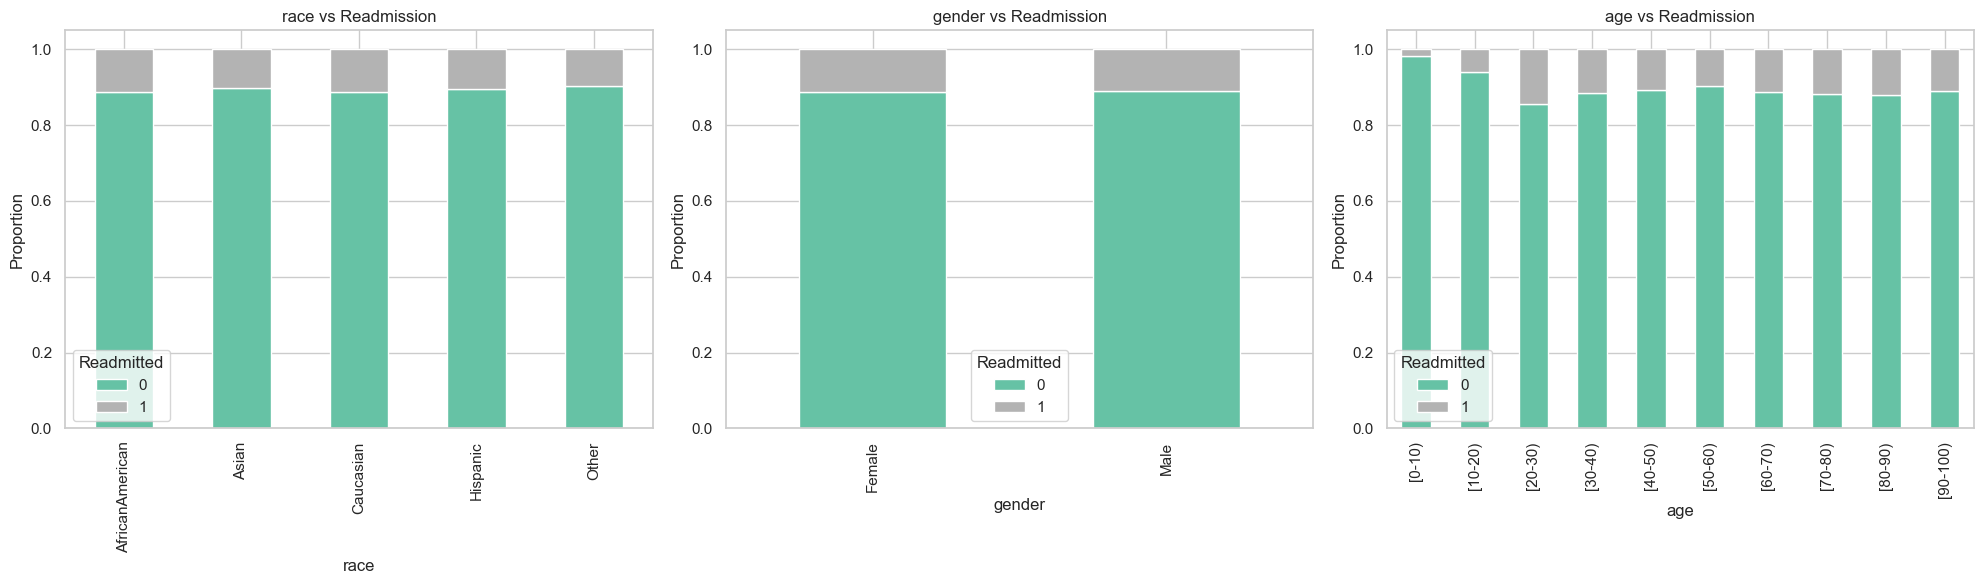

In [17]:
# Step 7: Feature-Target Relationships — Stacked bar plots and violin plots

# Categorical vs Target: Stacked bar for 'race', 'gender', 'age'
categorical_to_plot = ['race', 'gender', 'age']

# Prepare subplot
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, col in enumerate(categorical_to_plot):
    ax = axes[i]
    prop_df = (df.groupby([col, 'readmitted_30'])
                 .size()
                 .unstack(fill_value=0))
    prop_df = prop_df.div(prop_df.sum(axis=1), axis=0)
    prop_df.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')
    ax.set_title(f"{col} vs Readmission")
    ax.set_ylabel("Proportion")
    ax.set_xlabel(col)
    ax.legend(title="Readmitted", loc='best')

plt.tight_layout()
plt.savefig("../data/eda_figures/feature_target_relationships.png")
plt.show()

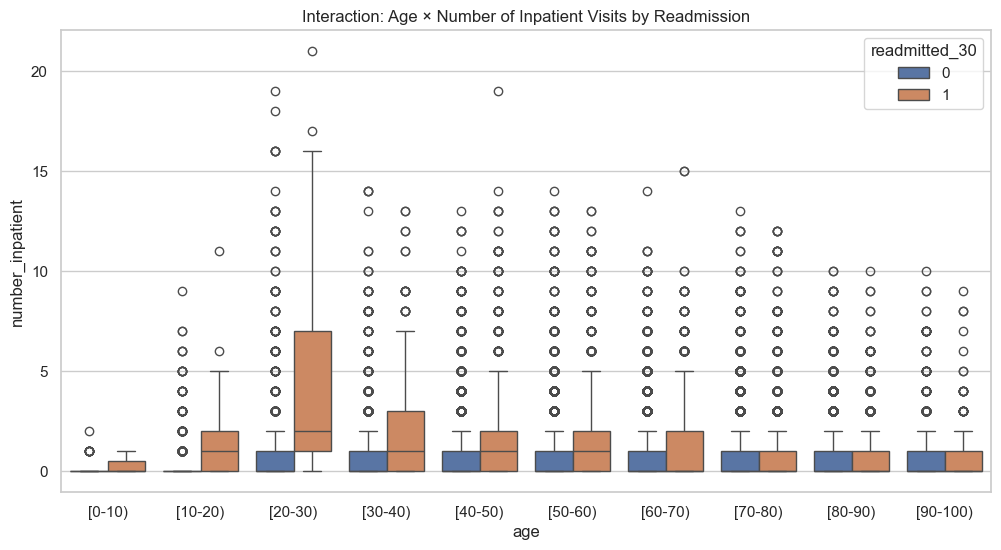

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='number_inpatient', hue='readmitted_30', data=df)
plt.title("Interaction: Age × Number of Inpatient Visits by Readmission")
plt.savefig("../data/eda_figures/interacting_features_1.png")
plt.show()

In [19]:
pd.crosstab(index=[df['diabetesMed'], df['insulin']], columns=df['readmitted_30'], normalize='index')

readmitted_30               0         1
diabetesMed insulin                    
No          No       0.903569  0.096431
Yes         Down     0.859955  0.140045
            No       0.894782  0.105218
            Steady   0.888201  0.111799
            Up       0.868849  0.131151

In [20]:
# Race
(df.groupby('race')['readmitted_30']
   .mean()
   .sort_values(ascending=False))

# Gender
(df.groupby('gender')['readmitted_30']
   .mean()
   .sort_values(ascending=False))

# Age
(df.groupby('age')['readmitted_30']
   .mean()
   .sort_values(ascending=False))


age
[20-30)     0.144010
[80-90)     0.120714
[70-80)     0.118502
[30-40)     0.114085
[60-70)     0.112289
[90-100)    0.110866
[40-50)     0.106603
[50-60)     0.097425
[10-20)     0.058651
[0-10)      0.018750
Name: readmitted_30, dtype: float64

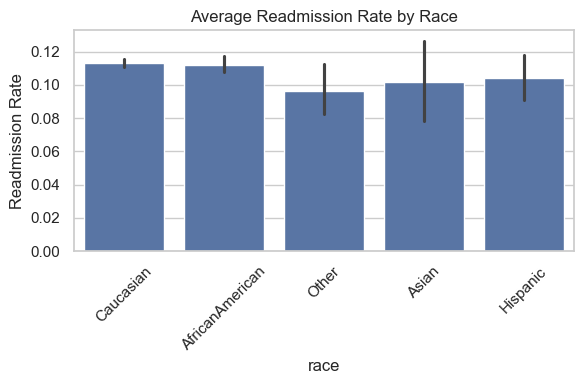

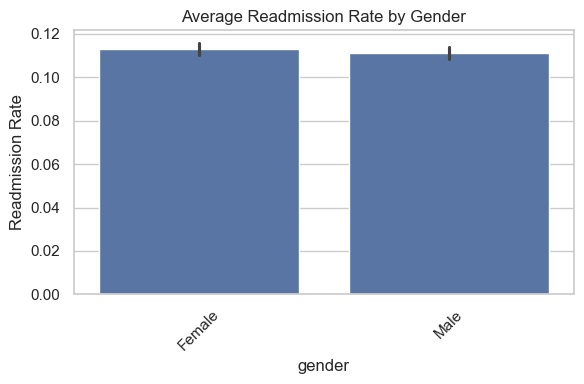

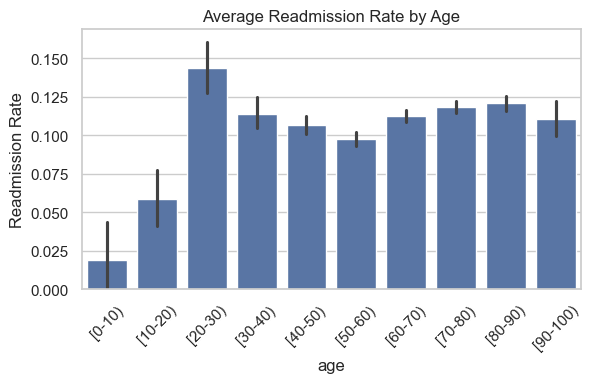

In [21]:
for feature in ['race', 'gender', 'age']:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=feature, y='readmitted_30', data=df, estimator='mean')
    plt.title(f"Average Readmission Rate by {feature.title()}")
    plt.ylabel("Readmission Rate")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()